In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from scipy.ndimage.measurements import label
import pdb

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"

In [3]:
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), block_norm= 'L2-Hys',
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), block_norm= 'L2-Hys',
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

In [4]:
ystart = 400
ystop = 656
scale = 2

6.371596931213037


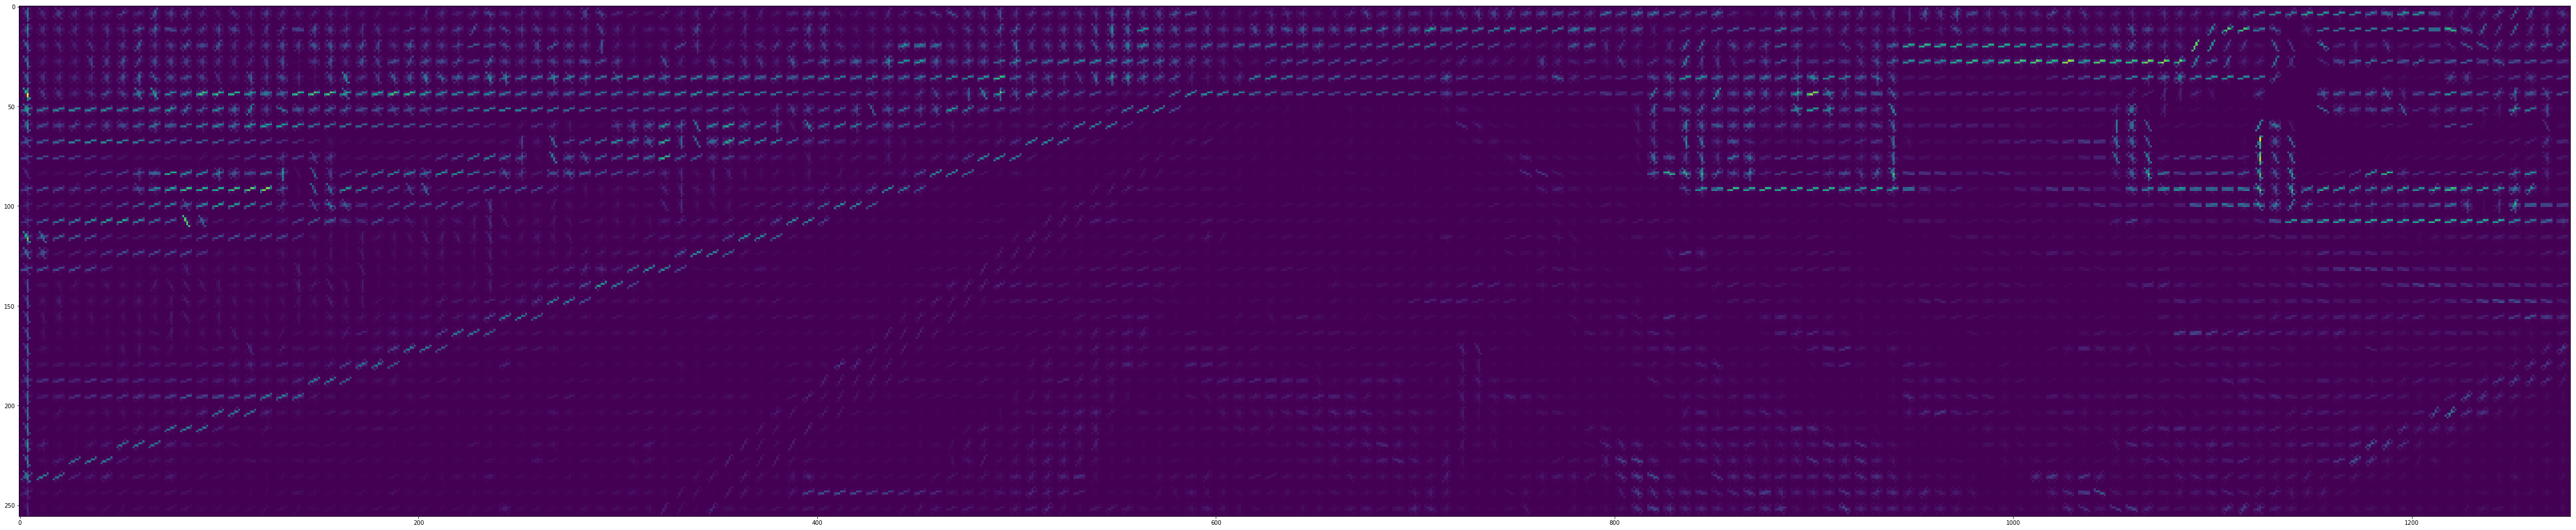

In [17]:
img = mpimg.imread('./test_images/test1.jpg')

hog1, hog_fig = get_hog_features(img[ystart:ystop,:,0].astype(np.float64)/128, orient, pix_per_cell, cell_per_block, vis=True)
plt.figure(figsize=(80,40))
plt.imshow(hog_fig)
print(np.mean(hog1))

0.5645380750383603


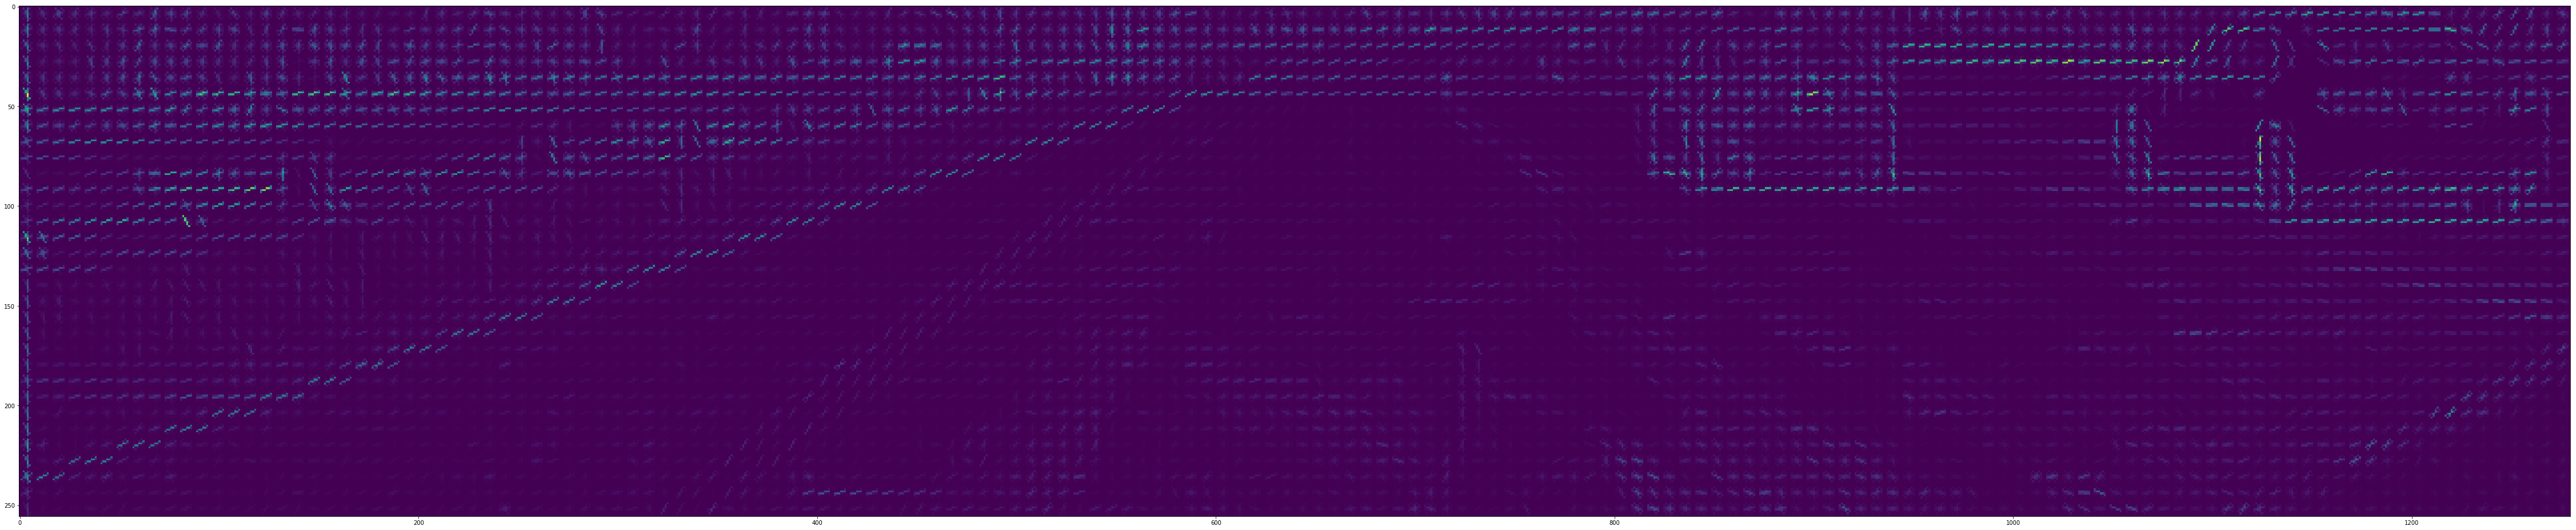

In [18]:
hog2, hog_fig2 = get_hog_features(img[ystart:ystop,:,0], orient, pix_per_cell, cell_per_block, vis=True)
plt.figure(figsize=(80,40))
plt.imshow(hog_fig2)
print(np.mean(hog2))

In [19]:
np.linalg.norm(hog2/np.linalg.norm(hog2) - hog1/np.linalg.norm(hog1))

0.06979242507742023